# Lezione 06

## Dario Pullia

### Esercizio 06.1

Spiegazioni varie
Ho acc. rate da cani. Come sistemo?


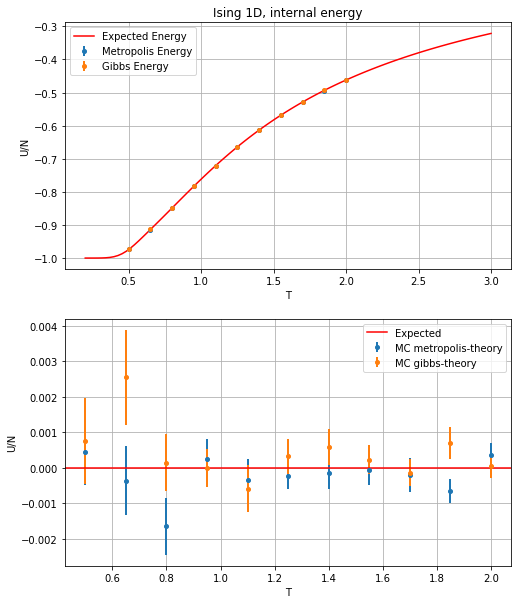

In [126]:
import numpy as np
import matplotlib.pyplot as plt


def AutoC(t, vec):
    appo1=0
    appo2=0
    appo3=0
    appo4=0
    appo5=0
    tmax=0
    tmax=vec.size
    for i in range(tmax-t):
        appo1+=vec[i]*vec[i+t]
        appo2+=vec[i]
        appo3+=vec[i+t]
    for i in range(tmax):
        appo4+=vec[i]*vec[i]
        appo5+=vec[i]
        
    return (appo1/(tmax-t) - appo2*appo3/((tmax-t)*(tmax-t)))/((appo4/tmax)-(appo5/tmax)**2)    






points=100
x=[]
for i in range(11):
    x.append(0.5+0.15*i)

T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th    
#Queste s stanno per short
Ts = np.linspace(0.5,2.0,num=11)
betas = 1/Ts
Js = 1.0
Nss = 50
ths = np.tanh(Js/Ts)
thNs= ths**Nss
chs = 1/ths    
    
    
    
metro_Energy, metro_ErrEnergy= np.loadtxt("data01/metropolis/last_output.ene.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Energy, gibbs_ErrEnergy= np.loadtxt("data01/gibbs/last_output.ene.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')





e = -J*( th + ch*thN )/( 1 + thN )



fig, ax = plt.subplots(2,figsize=(8, 10))


ax[0].plot(T, e, label="Expected Energy",color = 'r',)
ax[0].errorbar(x,metro_Energy, yerr=metro_ErrEnergy,label="Metropolis Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Energy, yerr=gibbs_ErrEnergy,label="Gibbs Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Ising 1D, internal energy')
ax[0].set_xlabel('T')
ax[0].set_ylabel('U/N')
ax[0].grid()
ax[0].legend()




es = -Js*( ths + chs*thNs )/( 1 + thNs )


ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Expected")
ax[1].errorbar(x,metro_Energy-es, yerr=metro_ErrEnergy, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-theory")
ax[1].errorbar(x,gibbs_Energy-es, yerr=gibbs_ErrEnergy, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-theory")
ax[1].set_title('')
ax[1].set_xlabel('T')
ax[1].set_ylabel('U/N')
ax[1].grid()
ax[1].legend()


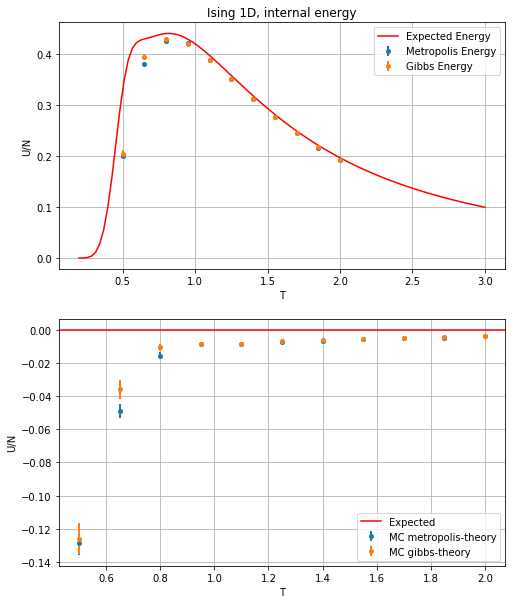

In [127]:

metro_Heat, metro_ErrHeat= np.loadtxt("data01/metropolis/last_output.heat.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Heat, gibbs_ErrHeat= np.loadtxt("data01/gibbs/last_output.heat.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')


heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)



fig, ax = plt.subplots(2,figsize=(8, 10))


ax[0].plot(T, heat, label="Expected Energy",color = 'r',)
ax[0].errorbar(x,metro_Heat, yerr=metro_ErrHeat,label="Metropolis Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Heat, yerr=gibbs_ErrHeat,label="Gibbs Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Ising 1D, internal energy')
ax[0].set_xlabel('T')
ax[0].set_ylabel('U/N')
ax[0].grid()
ax[0].legend()




heats=((betas*Js)**2)*(((1+thNs+(Nss-1)*(ths**2)+(Nss-1)*(chs**2)*thNs)/(1+thNs))-Nss*((ths+chs*thNs)/(1+thNs))**2)


ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Expected")
ax[1].errorbar(x,metro_Heat-heats, yerr=metro_ErrHeat, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-theory")
ax[1].errorbar(x,gibbs_Heat-heats, yerr=gibbs_ErrHeat, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-theory")
ax[1].set_title('')
ax[1].set_xlabel('T')
ax[1].set_ylabel('U/N')
ax[1].grid()
ax[1].legend()



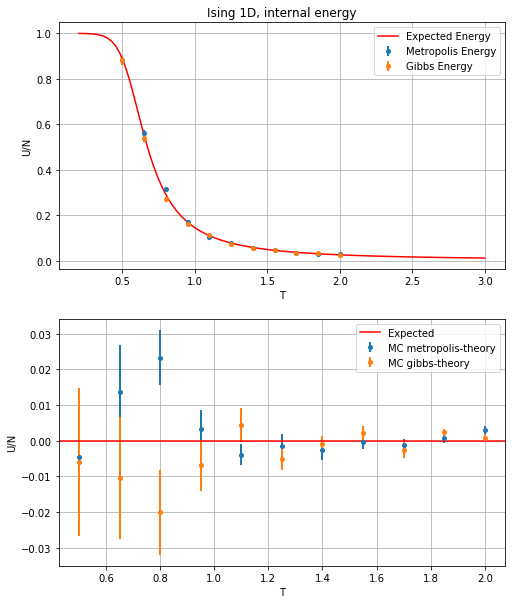

In [128]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)



metro_Mag, metro_ErrMag= np.loadtxt("data01/metropolis/last_output.mag.0.020000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Mag, gibbs_ErrMag= np.loadtxt("data01/gibbs/last_output.mag.0.020000", usecols=(2,3,), delimiter=' ', unpack='true')





fig, ax = plt.subplots(2,figsize=(8, 10))


ax[0].plot(T, mag, label="Expected Energy",color = 'r',)
ax[0].errorbar(x,metro_Mag, yerr=metro_ErrMag,label="Metropolis Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Mag, yerr=gibbs_ErrMag,label="Gibbs Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Ising 1D, internal energy')
ax[0].set_xlabel('T')
ax[0].set_ylabel('U/N')
ax[0].grid()
ax[0].legend()


hs=0.02
bs = 1/Ts
l1s = np.exp(bs*Js)*np.cosh(bs*hs)+np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js))
l2s = np.exp(bs*Js)*np.cosh(bs*hs)-np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js))
Zs = l1s**Nss + l2s**Nss
mags = (np.exp(bs*Js)*np.sinh(bs*hs)*((l1s**(Nss-1))*(1+np.exp(bs*Js)*np.cosh(bs*hs)/np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js))) 
        + (l2s**(Nss-1))*(1-np.exp(bs*Js)*np.cosh(bs*hs)/np.sqrt(np.exp(2*bs*Js)*np.cosh(bs*hs)*np.cosh(bs*hs)-2*np.sinh(2*bs*Js)))))/(Zs)





ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Expected")
ax[1].errorbar(x,metro_Mag-mags, yerr=metro_ErrMag, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-theory")
ax[1].errorbar(x,gibbs_Mag-mags, yerr=gibbs_ErrMag, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-theory")
ax[1].set_title('')
ax[1].set_xlabel('T')
ax[1].set_ylabel('U/N')
ax[1].grid()
ax[1].legend()





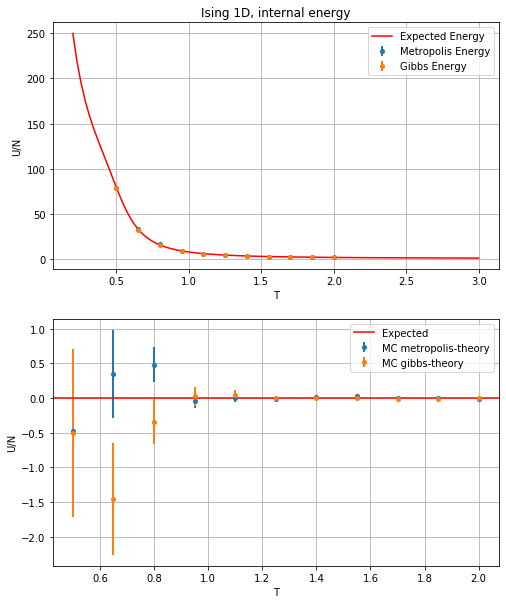

In [129]:

metro_Chi, metro_ErrChi= np.loadtxt("data01/metropolis/last_output.chi.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')
gibbs_Chi, gibbs_ErrChi= np.loadtxt("data01/gibbs/last_output.chi.0.000000", usecols=(2,3,), delimiter=' ', unpack='true')


chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)



fig, ax = plt.subplots(2,figsize=(8, 10))


ax[0].plot(T, chi, label="Expected Energy",color = 'r',)
ax[0].errorbar(x,metro_Chi, yerr=metro_ErrChi,label="Metropolis Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].errorbar(x,gibbs_Chi, yerr=gibbs_ErrChi,label="Gibbs Energy",linestyle="", linewidth=2, marker="o" ,markersize=4)
ax[0].set_title('Ising 1D, internal energy')
ax[0].set_xlabel('T')
ax[0].set_ylabel('U/N')
ax[0].grid()
ax[0].legend()




chis = betas*np.exp(2*betas*Js)*(1-thNs)/(1+thNs)


ax[1].axhline(y = 0, color = 'r', linestyle = '-',label="Expected")
ax[1].errorbar(x,metro_Chi-chis, yerr=metro_ErrChi, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC metropolis-theory")
ax[1].errorbar(x,gibbs_Chi-chis, yerr=gibbs_ErrChi, linestyle="",linewidth=2, marker="o" ,markersize=4, label="MC gibbs-theory")
ax[1].set_title('')
ax[1].set_xlabel('T')
ax[1].set_ylabel('U/N')
ax[1].grid()
ax[1].legend()


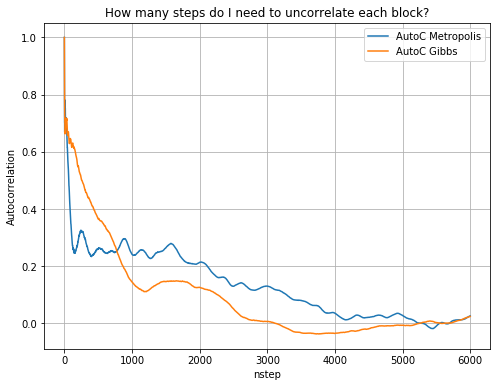

In [135]:
x = np.arange(6000) 

E_gibbs  = np.loadtxt("data01/corr_test_t_14/gibbs/output.ene.0.000000", usecols=(2), delimiter=' ', unpack='true')
E_metro  = np.loadtxt("data01/corr_test_t_14/metropolis/output.ene.0.000000", usecols=(2), delimiter=' ', unpack='true')


fig=plt.figure(figsize=(8, 6))

Gibbs=[]
Metro=[]

for i in range(6000):
    
    Metro.append(AutoC(i, E_metro))
    Gibbs.append(AutoC(i, E_gibbs))



plt.plot(x,Metro, label="AutoC Metropolis")
plt.plot(x,Gibbs,label="AutoC Gibbs")

plt.xlabel('nstep')
plt.ylabel('Autocorrelation')
plt.title('How many steps do I need to uncorrelate each block?')
plt.grid(True)
plt.legend()
plt.show()
